In [1]:
import rasterio as rio
import matplotlib.pyplot as plt


In [4]:
path_mdiwi_thre = 'data/data-section-6/s2_chenggong_mndwi_thre015.tif'



In [11]:
rsimg_rio = rio.open(path_mdiwi_thre)
arr = rsimg_rio.read(1)
arr.shape
transform = rsimg_rio.transform
crs = rsimg_rio.crs
crs


CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [15]:
import numpy as np
np.unique(arr)
arr[arr < -10000] = np.nan


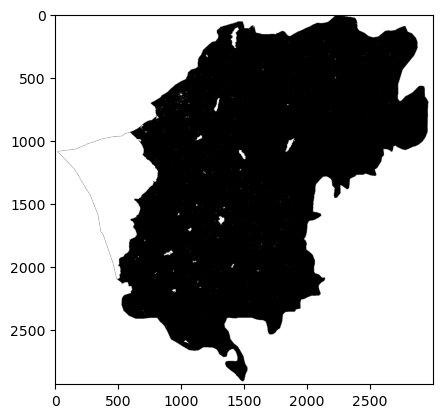

In [16]:
plt.imshow(arr, cmap='gray')


In [29]:
from rasterio import features
from shapely import Polygon
geos_values = features.shapes(arr, transform=transform)



In [ ]:
geos, values = [], []
for geo, value in geos_values:
    geos.append(geo['coordinates']) 
    values.append(value)


In [41]:
values


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

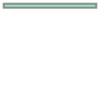

In [43]:
geos_poly = []
for geo in geos:
    geo_poly = Polygon(geo[0])
    geos_poly.append(geo_poly)

geos_poly[0]


In [51]:
import geopandas as gpd 
poly_gdf = gpd.GeoDataFrame({'value':values, 'geometry':geos_poly}, crs=crs)
poly_gdf = poly_gdf[poly_gdf['value'] == 1]
poly_gdf.head()


,value,geometry
0,1.0,"POLYGON ((102.92703 24.99008, 102.92703 24.989..."
1,1.0,"POLYGON ((102.92683 24.98998, 102.92683 24.989..."
2,1.0,"POLYGON ((102.93015 24.98998, 102.93015 24.989..."
3,1.0,"POLYGON ((102.92663 24.98978, 102.92663 24.989..."
4,1.0,"POLYGON ((102.93126 24.98978, 102.93126 24.989..."


<Axes: >

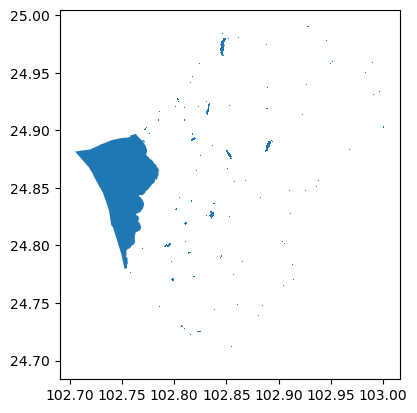

In [52]:
poly_gdf.plot()


In [53]:
poly_gdf.to_file('data/data-section-6/s2_chenggong_mndwi_thre015.gpkg', driver='GPKG')



In [ ]:
import geopandas as gpd
import rasterio as rio
from rasterio import features



In [54]:
path_vec = 'data/data-section-6/s2_chenggong_mndwi_thre015.gpkg'



In [82]:
vec_gpd = gpd.read_file(path_vec)
vec_gpd['id'] = vec_gpd.index
vec_gpd.head()
# vec_gpd.plot()


,value,geometry,id
0,1.0,"POLYGON ((102.92703 24.99008, 102.92703 24.989...",0
1,1.0,"POLYGON ((102.92683 24.98998, 102.92683 24.989...",1
2,1.0,"POLYGON ((102.93015 24.98998, 102.93015 24.989...",2
3,1.0,"POLYGON ((102.92663 24.98978, 102.92663 24.989...",3
4,1.0,"POLYGON ((102.93126 24.98978, 102.93126 24.989...",4


In [61]:
geos = []
for geo in vec_gpd['geometry']:
    geos.append(geo)

# geos


In [67]:
path_base_img = 'data/data-section-6/s2_chenggong_mndwi_thre015.tif'
raster = rio.open(path_base_img)
transform = raster.transform
raster_arr = raster.read(1)
raster_arr.shape

(2935, 2996)

In [75]:
rasterized = features.rasterize(
                    shapes=geos,
                    out_shape=raster_arr.shape,
                    fill=0,
                    default_value=1,
                    transform=transform)


In [78]:
np.unique(rasterized)


array([0, 1])

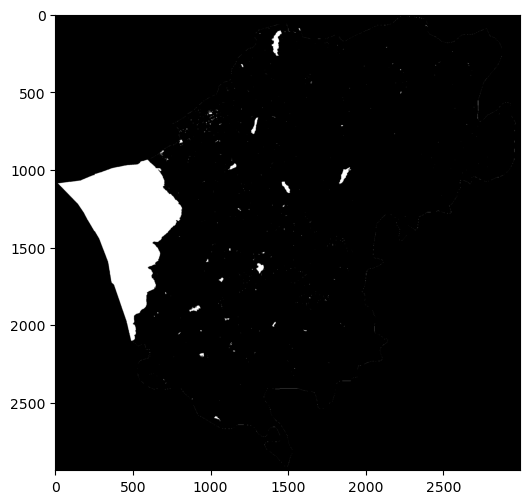

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(rasterized, cmap='gray')


In [80]:
path_raster_save = 'data/data-section-6/s2_chenggong_mndwi_thre015_rasterized.tif'

with rio.open(fp=path_raster_save, 
                mode='w', 
                driver='GTiff',
                height=raster_arr.shape[0],
                width=raster_arr.shape[1],
                count=1,
                dtype=np.int16,
                crs=raster.crs,
                transform=transform
              ) as dst:
    dst.write(rasterized, 1)

